In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import os
import sys

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import scanpy as sc

# read the full GSE dataset
adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_Hao/GSE164378_Hao/batch_corrected/Hao_PBMC_Harmony_unscaled.h5ad')
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Batch_corrected\Hao_PBMC_Harmony_unscaled.h5ad")
adata.shape

(161764, 33538)

In [3]:
adata.obs['celltype.l1'] = adata.obs['celltype.l1'].str.replace(' ', '_')

label = adata.obs['celltype.l1'].tolist()
types = np.unique(label).tolist()
print(types)

['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']


In [4]:
likelihood_df = pd.read_csv('L1_likelihood_df.csv', index_col=0)
likelihood_df.index = adata.obs_names
likelihood_df.head()

,B,CD4_T,CD8_T,DC,Mono,NK,other,other_T
L1_AAACCCAAGAAACTCA,0.000011,0.000011,0.000188,2.813255e-05,0.903462,0.000031,0.002287,0.000010
L1_AAACCCAAGACATACA,0.000024,0.998812,0.020271,2.689498e-09,0.000012,0.000140,0.002949,0.001594
L1_AAACCCACAACTGGTT,0.000057,0.009312,0.999565,1.297607e-09,0.000004,0.000050,0.001976,0.008503
L1_AAACCCACACGTACTA,0.000036,0.000004,0.004689,1.763011e-09,0.000013,0.999984,0.003752,0.006080
L1_AAACCCACAGCATACT,0.000025,0.000221,0.998231,4.486027e-10,0.000008,0.000012,0.003492,0.008268


In [5]:
likelihood_df.shape

(161764, 8)

In [6]:
adata.obs.head()

,celltype.l1,celltype.l2,celltype.l3,Batch,donor,time,lane,Phase,nCount_ADT,nFeature_ADT,nCount_RNA,nFeature_RNA,leiden
L1_AAACCCAAGAAACTCA,Mono,CD14 Mono,CD14 Mono,Batch1,P2,7,L1,G1,7535,217,10823,2915,4
L1_AAACCCAAGACATACA,CD4_T,CD4 TCM,CD4 TCM_1,Batch1,P1,7,L1,G1,6013,209,5864,1617,2
L1_AAACCCACAACTGGTT,CD8_T,CD8 Naive,CD8 Naive,Batch1,P4,2,L1,S,6620,213,5067,1381,5
L1_AAACCCACACGTACTA,NK,NK,NK_2,Batch1,P3,7,L1,G1,3567,202,4786,1890,3
L1_AAACCCACAGCATACT,CD8_T,CD8 Naive,CD8 Naive,Batch1,P4,7,L1,G1,6402,215,6505,1621,5


In [7]:
# Concatenate the likelihood_df with the adata.obs
adata.obs = pd.concat([adata.obs, likelihood_df], axis=1)
adata.obs.head()

,celltype.l1,celltype.l2,celltype.l3,Batch,donor,time,lane,Phase,nCount_ADT,nFeature_ADT,...,nFeature_RNA,leiden,B,CD4_T,CD8_T,DC,Mono,NK,other,other_T
L1_AAACCCAAGAAACTCA,Mono,CD14 Mono,CD14 Mono,Batch1,P2,7,L1,G1,7535,217,...,2915,4,0.000011,0.000011,0.000188,2.813255e-05,0.903462,0.000031,0.002287,0.000010
L1_AAACCCAAGACATACA,CD4_T,CD4 TCM,CD4 TCM_1,Batch1,P1,7,L1,G1,6013,209,...,1617,2,0.000024,0.998812,0.020271,2.689498e-09,0.000012,0.000140,0.002949,0.001594
L1_AAACCCACAACTGGTT,CD8_T,CD8 Naive,CD8 Naive,Batch1,P4,2,L1,S,6620,213,...,1381,5,0.000057,0.009312,0.999565,1.297607e-09,0.000004,0.000050,0.001976,0.008503
L1_AAACCCACACGTACTA,NK,NK,NK_2,Batch1,P3,7,L1,G1,3567,202,...,1890,3,0.000036,0.000004,0.004689,1.763011e-09,0.000013,0.999984,0.003752,0.006080
L1_AAACCCACAGCATACT,CD8_T,CD8 Naive,CD8 Naive,Batch1,P4,7,L1,G1,6402,215,...,1621,5,0.000025,0.000221,0.998231,4.486027e-10,0.000008,0.000012,0.003492,0.008268


## UMAP

In [8]:
types

['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']

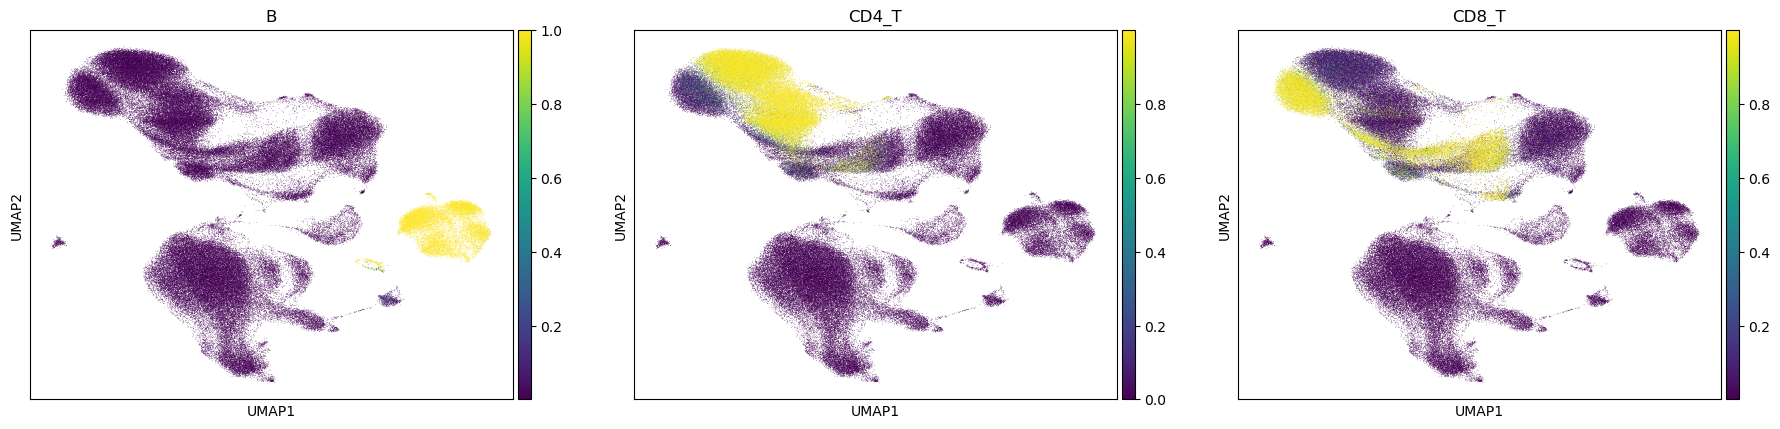

In [11]:
sc.pl.umap(adata, color=['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK'])

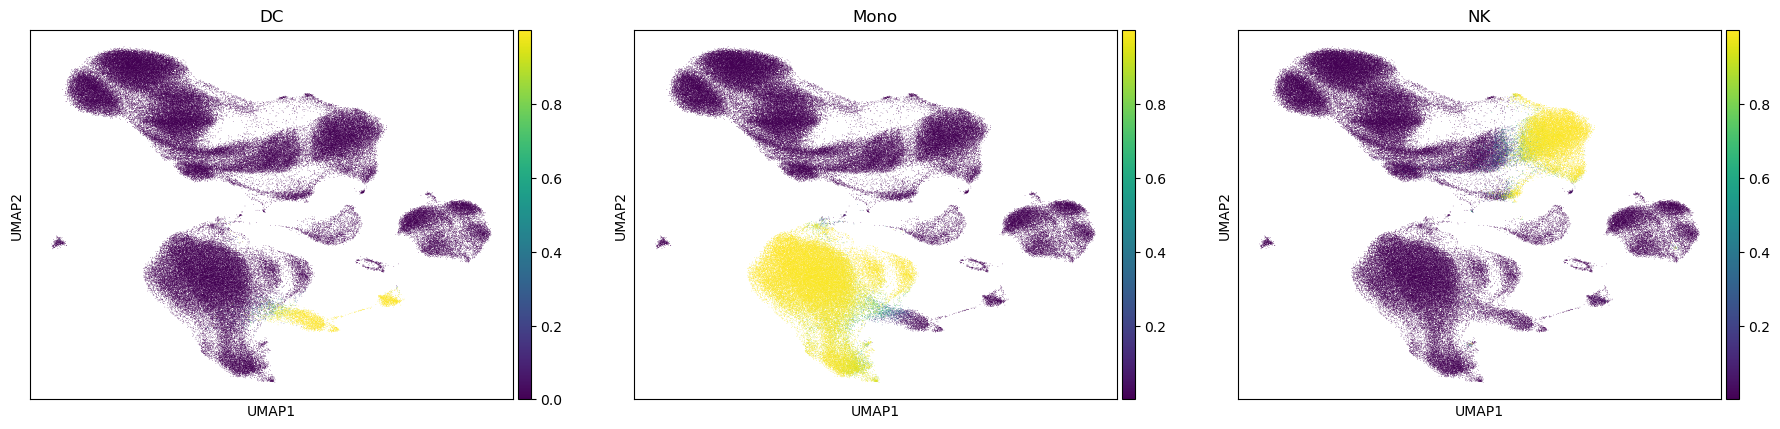

In [12]:
sc.pl.umap(adata, color=['DC', 'Mono', 'NK'])

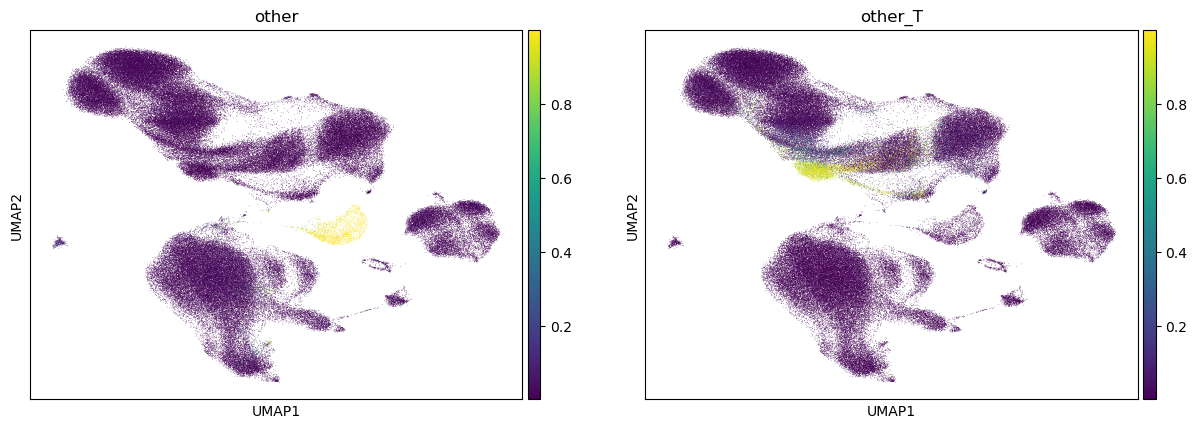

In [10]:
sc.pl.umap(adata, color=['other', 'other_T'])